<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Предварительно можно утверждать, что данных достаточно для проведения анализа.

Но в датафрейме обнаружен ряд проблем:
- Большое количество пропущенных значений - их нужно детально изучить.
- Нужно поправить названия нескольких столбцов.
- Необходимо изменить тип данных в нескольких столбцах.

## Предобработка данных

Предобработку начнём с приведения названий столбцов в соответствие с хорошим стилем.

In [ ]:
#Переименование столбцов:
df = df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    }
)
#Проверка результата:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Проверим данные на наличие явных дубликатов.

In [ ]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено.
Переходим к изучению пропущенных значений.

In [ ]:
#Подсчёт пропусков:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце с числом балконов вероятнее всего означают, что в квартирах балконов нет. Заполним эти значения нулями.

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

Пропуски в столбце с названием населённого пункта могли явиться следствием того, что продавец по какой-то причине решил скрыть эти данные. И мы их можем заменить значением "Не указан", так как для косвенного определения географического положения можно использовать данные из других столбцов.

In [ ]:
df['locality_name'] = df['locality_name'].fillna('Не указан')

Пропуски в столбце с общим количеством этажей в доме могут быть следствием того, что у дома всего один этаж, либо продавец случайно или намеренно не указал эту информацию. Этих пропусков совсем немного. Можно ими "пожертвовать".

In [ ]:
df = df.dropna(subset=['floors_total'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

- Пропуски в столбце с высотой потолков заменить нечем и просто удалить строки с ними мы не можем - это почти половина датафрейма. Их возникновение могло быть следствием того, что продавец по какой-то причине решил утаить этот параметр, либо посчитал эти данные не столь важными.
- Пропущенные значения в столбце с жилой площадью заменять нечем, удалять строки с ними пока не будем - они занимают почти 10% данных. Это один из важных параметров. И тот факт, что он не указан, может быть следствием того, что с ним имеются проблемы (например, была сделана незаконная перепланировка).
- Пропуски в столбце с площадью кухни заменить нечем, удалять строки с ними не будем - они могут быть обусловлены отсутствием кухни, например.
- Данные в столбцах с указанием парков, аэропортов и водоёмов поблизости заполнялись автоматически на основе картографических данных. Пропуски в этих столбцах могут появились вероятно из-за невозможности определения геолокации. Исключить строки с пропусками мы не можем - они занимают приличную часть датафрейма (до 75%). Если потребуется заполнение, то как ориентир можно взять название населённого пункта и проверить какие парки и водоёмы имеются поблизости от него.
- Пропуски в столбце с количеством дней размещения объявления от публикации до снятия могут означать, что объявление всё ещё опубликовано. Таких значений 13% от всего датафрейма - эти данные будет разумнее не удалять, а  заполнить разницей между датой публикации и текущей датой, например.
- Заполнить пропуски в "проблемных" столбцах, ориентируясь на данные о населённых пунктах. Возможно, придётся удалить данные, в которых не указан населённый пункт и имеются пропуски в других столбцах, указывающих на географическое положение.

Переходим к изменению типов данных.

- Столбец 'first_day_exposition' - сделаем тип 'datetime'. Для того, чтобы с данными можно было выполнять математические действия.
- Столбцы 'last_price', 'floors_total', 'balcony' - сделаем целочисленными. Так как они не могут быть не целыми.
- Столбец 'is_apartment' - сделаем булевым. Для оптимизации потребления памяти.

In [ ]:
#Проверка количества каждого значения в столбце 'is_apartment'.
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [ ]:
#Изменение в столбце 'first_day_exposition':
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#Изменение в столбце 'is_apartment':
#df['is_apartment'] = df['is_apartment'].astype('bool')

#Изменение типа данных на целочисленный:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

Заменим пропущенные значения в столбце 'is_apartment' на 'False'.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(0)

#Изменение в столбце 'is_apartment':
df['is_apartment'] = df['is_apartment'].astype('bool')

display(df['is_apartment'].value_counts())
df.info()

False    23563
True        50
Name: is_apartment, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу цену за квадратный метр.

In [ ]:
df['price_per_sq_meter'] = df['last_price'] / df['total_area']

Добавим день недели, месяц и год публикации объявления.

In [ ]:
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

Добавим столбец, в котором разделим этаж квартир на группы: 'Первый', 'Последний', 'Другой'.

In [ ]:
#Создание функции.
def floor_category(row):
    """
    Возвращает группу этажа по значению из столбца 'floor', используя правила:
    - 'первый', если floor = 1;
    - 'последний', если floor = floors_total;
    - 'другой' - все остальные.
    """
    floor = row['floor']
    floors_total = row['floors_total']
    
    try:
        if floor == 1:
            return 'первый'
        if floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        display('Введено некорректное значение')

#Проверка работоспособности функции.
row_values = [12, 'Nan']
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)
display(floor_category(row))

#Добавление нового столбца в датафрейм.
df['floor_category'] = df.apply(floor_category, axis=1)

'другой'

Добавление столбца с соотношением жилой и общей площади.

In [ ]:
df['living_area_ratio'] = df['living_area'] / df['total_area']

Добавим столбец с соотношением площади кухни и общей площади.

In [ ]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

#Вывод первых пяти строк таблицы.
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_sq_meter,year_exposition,month_exposition,weekday_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,234.0,424.0,408176.100629,2015,7,4,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000


## Исследовательский анализ данных

<b>Изучение параметров квартир, представленных в датафрейме. Начнём с площади.</b>

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

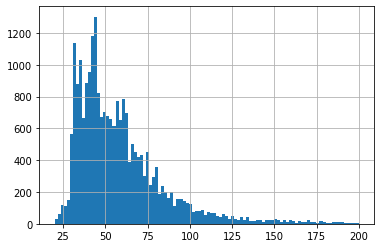

In [ ]:
display(df['total_area'].describe())
df['total_area'].hist(bins=100, range=(20, 200))

Основная масса квартир представлена интервалом площадей от 25 до 80 кв.м. При этом среднее и медианное значения практически равны.

<b>Посмотрим числовое описание данных в колонке цен и построим гистограмму по данным из этой колонки.</b>

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

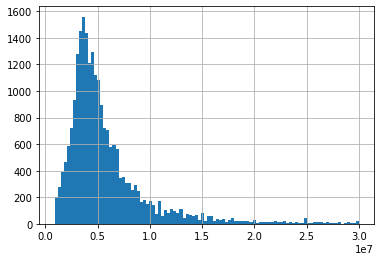

In [ ]:
display(df['last_price'].describe())
df['last_price'].hist(bins=100, range=(900000, 30000000))

Большинство квартир продаётся в диапазоне цен от 2 до 8 млн.

<b>Изучение квартир по данным из столбца с чилом комнат.</b>

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

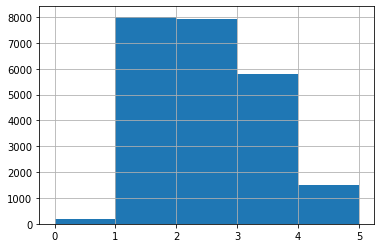

In [ ]:
display(df['rooms'].describe())
df['rooms'].hist(bins=5, range=(0, 5))
df['rooms'].value_counts()

В основном на рынке представлены одно- и двухкомнатные квартиры. Также велика доля трёхкомнатных.

<b>Анализ квартир по данным о высоте потолков.</b>

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

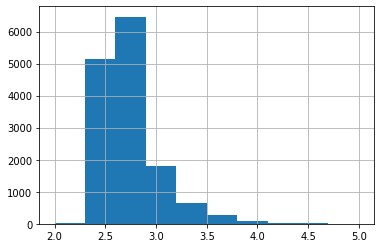

In [ ]:
display(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=10, range=(2, 5))

Большинство квартир на изучаемом рынке с высотой потолков 2.3 - 2.8 метра. Также здесь присутствуют явные аномалии (значение высоты 1 метр и 100 метров).

<b>Изучение времени продажи квартиры.</b>

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

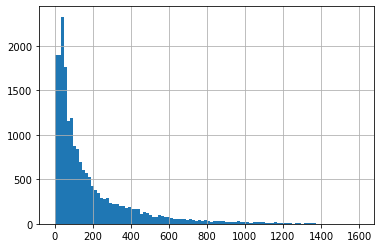

In [ ]:
display(df['days_exposition'].describe())
df['days_exposition'].hist(bins=100, range=(0, 1600))

Большинство квартир продаётся в течение трёх месяцев. Этот факт подтверждается и медианным значением срока продажи квартиры. А вот средний срок продажи получился равным половине года. Это связано с наличием неликвидных квартир которые не могут продать годами. Быстрой продажей можно считать, если квартира была реализована в течение месяца. Если же время публикации объявления переваливает за 300 дней, то продажа уже явно затянулась.

<b>Исключение редких и выбивающихся значений.</b>

Сделаем усредняющие срезы данных, уберём квартиры: 
- с очень маленькой или слишком большой площадью;
- с количеством комнат менее одной и более четырёх;
- с высотой потолков менее двух метров и более четырёх с с половиной;
- со сроком продажи более 600 дней.

(0.0, 114.0)

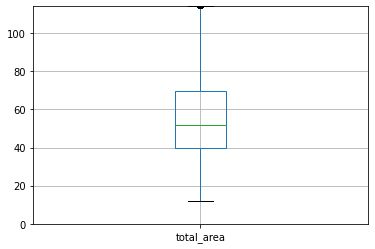

In [ ]:
#Проанализируем выбросы в площади.
df.boxplot(column=['total_area'])
plt.ylim(0, 114)

In [ ]:
#Исключим квариры с площадью более 114 кв.м.
df = df.query('total_area < 114')

(0.0, 10.0)

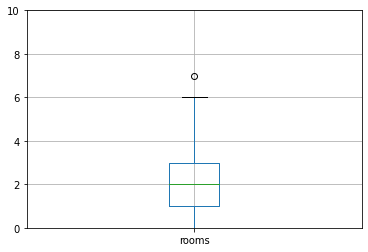

In [ ]:
#Проанализируем выбросы в количестве комнат.
df.boxplot(column=['rooms'])
plt.ylim(0, 10)

In [ ]:
#Исключим квариры с количеством комнат более 6.
df = df.query('rooms <= 6')

Заполним пропуски в столбце с высотой потолков медианными значениями. И отфильтруем квартиры с высотой потолков от 2.0 до 4.5 метров.

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

df = df.query('(ceiling_height > 2.0) and (ceiling_height < 4.5)')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22290 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22290 non-null  int64         
 1   last_price            22290 non-null  int64         
 2   total_area            22290 non-null  float64       
 3   first_day_exposition  22290 non-null  datetime64[ns]
 4   rooms                 22290 non-null  int64         
 5   ceiling_height        22290 non-null  float64       
 6   floors_total          22290 non-null  int64         
 7   living_area           20556 non-null  float64       
 8   floor                 22290 non-null  int64         
 9   is_apartment          22290 non-null  bool          
 10  studio                22290 non-null  bool          
 11  open_plan             22290 non-null  bool          
 12  kitchen_area          20185 non-null  float64       
 13  balcony         

После удаления редких и выбивающихся значений датафрейм уменьшился на 5.5%.

<b>Изучение влияния различных факторов на стоимость квартиры.</b>

Рассчитаем коэффициенты корреляции между стоимостью квартиры и площадью, числом комнат, удалённостью от центра.

In [ ]:
display('Коэффициент корреляции между площадью и стоимостью:', df['total_area'].corr(df['last_price']))
display('Коэффициент корреляции между числом комнат и стоимостью:', df['rooms'].corr(df['last_price']))
display('Коэффициент корреляции между расстоянием до центра и стоимостью:', df['city_centers_nearest'].corr(df['last_price']))

'Коэффициент корреляции между площадью и стоимостью:'

0.6851531572511955

'Коэффициент корреляции между числом комнат и стоимостью:'

0.3855283352205985

'Коэффициент корреляции между расстоянием до центра и стоимостью:'

-0.3375676648150895

Вывод: между площадью квартиры и её стоимостью прослеживается явная прямая зависимость. Между числом комнат в квартире и её стоимостью зависимость довольно низкая. Расстояние до центра и стоимость имеют обратную связь (чем больше один параметр, тем меньше другой).

Посмотрим  на зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [ ]:
df.pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
другой,5.543683e+06
первый,4.292660e+06
последний,4.846850e+06


Вывод: в среднем, квартиры, расположенные на первом и последнем этажах, стоят ниже, чем те, которые находятся на других.

Посмотрим связь между годом размещения объявления о продаже квартиры и её стоимостью по всем квартирам из выборки.

In [ ]:
df.pivot_table(index='year_exposition', values='last_price')

,last_price
year_exposition,
2014,7.848364e+06
2015,5.805149e+06
2016,5.270245e+06
2017,5.174448e+06
2018,5.186637e+06
2019,5.646237e+06


Вывод: квартиры с самой высокой стоимостью были выставлены на продажу в 2014 году. По остальным годам большой разницы не наблюдается.

Посмотрим связь между месяцем размещения объявления о продаже квартиры и её стоимостью по всем квартирам.

In [ ]:
df.pivot_table(index='month_exposition', values='last_price')

,last_price
month_exposition,
1,5.285561e+06
2,5.283446e+06
3,5.279125e+06
4,5.411016e+06
5,5.142496e+06
6,5.224978e+06
7,5.227881e+06
8,5.339512e+06
9,5.415277e+06


Вывод: между месяцем публикации объявления и стоимстью квартиры связи нет.

Посмотрим связь между днём публикации объявления о продаже квартиры и её стоимостью по всем квартирам.

In [ ]:
df.pivot_table(index='weekday_exposition', values='last_price')

,last_price
weekday_exposition,
0,5.320231e+06
1,5.349164e+06
2,5.314488e+06
3,5.363159e+06
4,5.230887e+06
5,5.130386e+06
6,5.160653e+06


Вывод: между днём недели публикации объявления о продаже квартиры и стоимостью квартиры связи нет.

array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='total_area'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='total_area'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='rooms'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='rooms'>,
        <AxesSubplot:xlabel='weekday_exposition', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>],
       [<AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSu

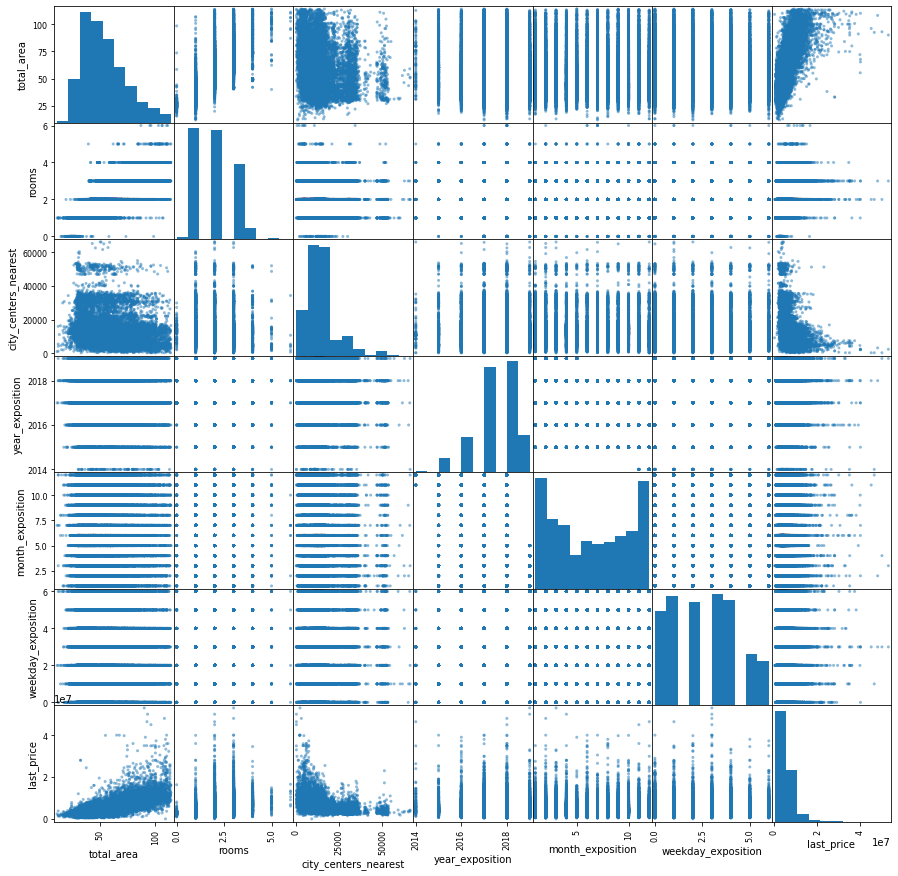

In [ ]:
analysis_by_parameters = df[['total_area', 'rooms', 'city_centers_nearest', 'floor_category', 'year_exposition', 'month_exposition', 'weekday_exposition', 'last_price']]
pd.plotting.scatter_matrix(analysis_by_parameters, figsize=(15, 15))

<b>Детальное изучение десяти населённых пунктов - рекордсменов по количеству объявлений.</b>

In [ ]:
#Создание переменной со списком топ-10 локаций по количеству объявлений и вывод списка.
locality_top_10 = df['locality_name'].value_counts().head(10)
display(locality_top_10)

Санкт-Петербург      14455
посёлок Мурино         518
посёлок Шушары         436
Всеволожск             394
Пушкин                 347
Колпино                336
посёлок Парголово      326
Гатчина                303
деревня Кудрово        298
Выборг                 224
Name: locality_name, dtype: int64

In [ ]:
#Вывод средней стоимости за квадратный метр.
df.query('locality_name in @locality_top_10.index').pivot_table(index='locality_name', values='price_per_sq_meter')

,price_per_sq_meter
locality_name,
Всеволожск,68738.959134
Выборг,58243.741445
Гатчина,68931.687349
Колпино,75370.025473
Пушкин,101960.374907
Санкт-Петербург,110634.960036
деревня Кудрово,92409.726322
посёлок Мурино,85645.903323
посёлок Парголово,90332.263023


Вывод: самая высокая средняя стоимость за квадратный метр в Санкт-Петербурге и Пушкине, самая низкая - в Выборге.

<b>Выяснение, какая область входит в центр.</b>

Создание столбца с расстоянием до центра в километрах с округлением до целого.

In [ ]:
df['city_center_nearest_km'] = (df['city_centers_nearest']/1000).round()

Определение центральной области.

<AxesSubplot:xlabel='city_center_nearest_km'>

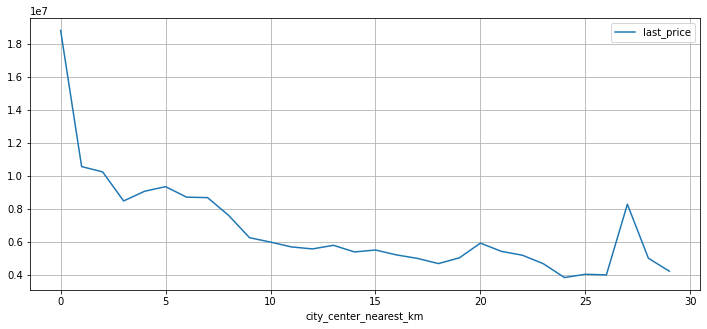

In [ ]:
#Градация по километрам в Санкт-Петербурге.
gradation_by_km = df.query('locality_name == "Санкт-Петербург"')['city_center_nearest_km'].value_counts()

#Средняя цена квартиры для каждого километра.
(
    df
    .query('(city_center_nearest_km in @gradation_by_km.index) and (locality_name == "Санкт-Петербург")')
    .pivot_table(index='city_center_nearest_km', values='last_price')
    .plot(grid=True, figsize=(12, 5))
)

Границы центральной области: "яма" на 2.5-3 км. может означать, что там продаётся жильё без ремонта, например, в совсем плохом состоянии, а после 5 км. начинается окончательное снижение цен. <b>За центральную область принимаю радиус 5 км.</b>

<b>Детальное изучение квартир в центре города.</b>

Выделим сегмент квартир в центре.

In [ ]:
#quarters_in_center = df.query('(locality_name == "Санкт-Петербург") and (city_center_nearest_km <= 2.5)')
quarters_in_center = df.query('(locality_name == "Санкт-Петербург") and (city_center_nearest_km <= 5)')
quarters_in_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 24 to 23691
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            1880 non-null   int64         
 1   last_price              1880 non-null   int64         
 2   total_area              1880 non-null   float64       
 3   first_day_exposition    1880 non-null   datetime64[ns]
 4   rooms                   1880 non-null   int64         
 5   ceiling_height          1880 non-null   float64       
 6   floors_total            1880 non-null   int64         
 7   living_area             1754 non-null   float64       
 8   floor                   1880 non-null   int64         
 9   is_apartment            1880 non-null   bool          
 10  studio                  1880 non-null   bool          
 11  open_plan               1880 non-null   bool          
 12  kitchen_area            1718 non-null   float6

Изучение следующих параметров этих квартир: площадь, цена, число комнат, высота потолков.

count    1880.000000
mean       71.463585
std        22.274066
min        12.000000
25%        54.775000
50%        70.950000
75%        89.400000
max       113.900000
Name: total_area, dtype: float64

<AxesSubplot:>

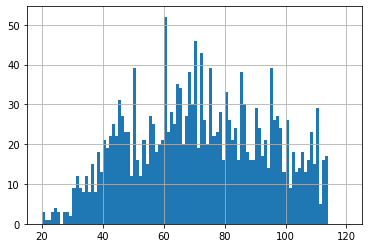

In [ ]:
#Анализ площадей.
display(quarters_in_center['total_area'].describe())
quarters_in_center['total_area'].hist(bins=100, range=(20, 120))

Вывод: большинство квартир с площадью от 40 до 100 кв.м., что больше, чем по всей базе в среднем.

count    1.880000e+03
mean     9.439024e+06
std      5.180670e+06
min      1.600000e+06
25%      6.499750e+06
50%      8.200000e+06
75%      1.090000e+07
max      5.300000e+07
Name: last_price, dtype: float64

<AxesSubplot:>

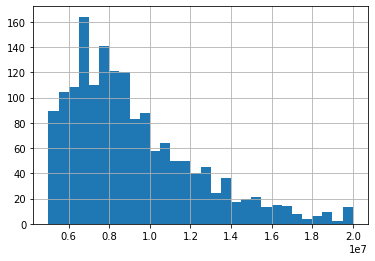

In [ ]:
#Анализ стоимости.
display(quarters_in_center['last_price'].describe())
quarters_in_center['last_price'].hist(bins=30, range=(5000000, 20000000))

Вывод: основная масса квартир имеет стоимость около 80-90 млн. Это гораздо дороже, чем в среднем по базе данных.

count    1880.000000
mean        2.446809
std         0.973486
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

<AxesSubplot:>

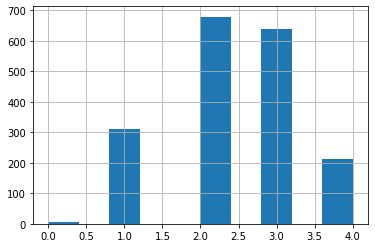

In [ ]:
#Анализ количетсва комнат.
display(quarters_in_center['rooms'].describe())
quarters_in_center['rooms'].hist(bins=10, range=(0, 4))

Вывод: большая часть квартир имеют две или три комнаты. В среднем по базе - 1-2 комнаты.

count    1880.000000
mean        2.936234
std         0.345614
min         2.400000
25%         2.640000
50%         2.820000
75%         3.150000
max         4.370000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

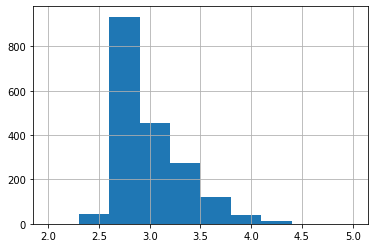

In [ ]:
#Анализ высоты потолков.
display(quarters_in_center['ceiling_height'].describe())
quarters_in_center['ceiling_height'].hist(bins=10, range=(2, 5))

Вывод: высота потолков у большинства квартир от 2.6 до 2.9 м. И это соответствует средним значениям по базе.

Выделение факторов, влияющих на стоимость квартир в центре.

In [ ]:
display('Коэффициент корреляции между площадью и стоимостью:', quarters_in_center['total_area'].corr(df['last_price']))
display('Коэффициент корреляции между числом комнат и стоимостью:', quarters_in_center['rooms'].corr(df['last_price']))
display('Коэффициент корреляции между расстоянием до центра и стоимостью:', quarters_in_center['city_centers_nearest'].corr(df['last_price']))

'Коэффициент корреляции между площадью и стоимостью:'

0.5199952893447635

'Коэффициент корреляции между числом комнат и стоимостью:'

0.20862671973635744

'Коэффициент корреляции между расстоянием до центра и стоимостью:'

-0.08651271051307355

Выводы: между площадью и стоимостью имеется прямая зависимость (как и в базе в целом), число комнат и расстояние до центра практически не влияют на стоимость этих квартир (по базе - расстояние до центра имеет значение).

In [ ]:
#Связь между этажом и стоимостью.
quarters_in_center.pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
другой,9.902976e+06
первый,7.316704e+06
последний,9.262149e+06


Самый дешёвый этаж - первый, следом - последний, на других этажах квартиры с более высокой ценой.

In [ ]:
#Связь между стоимостью квартиры и годом публикации объявления.
quarters_in_center.pivot_table(index='year_exposition', values='last_price')

,last_price
year_exposition,
2014,1.837866e+07
2015,9.277335e+06
2016,8.822373e+06
2017,9.189822e+06
2018,9.493305e+06
2019,1.069342e+07


Вывод: наиболее дорогие квартиры были выставлены на продажу в 2014 и 2019 годах. Что частично соответствует данным по базе в целом - самый дорогой год был 2014.

In [ ]:
#Связь между стоимостью квартиры и месяцем публикации объявления.
quarters_in_center.pivot_table(index='month_exposition', values='last_price')

,last_price
month_exposition,
1,9.835566e+06
2,9.975207e+06
3,1.006708e+07
4,9.893181e+06
5,8.432069e+06
6,8.948895e+06
7,9.213038e+06
8,9.477723e+06
9,9.344504e+06


Вывод: самые дорогие квартиры выставлялись на продажу в марте. По всей базе связь не обнаружена.

In [ ]:
#Связь между стоимостью квартиры и днём недели публикации объявления.
quarters_in_center.pivot_table(index='weekday_exposition', values='last_price')

,last_price
weekday_exposition,
0,9.689832e+06
1,9.486393e+06
2,9.394488e+06
3,9.849137e+06
4,9.016233e+06
5,8.625887e+06
6,9.513504e+06


Вывод: наиболее дешёвые квартиры выставлялись на продажу по субботам. По базе в целом связи стоимости с днём недели нет.

## Общий вывод

По итогам изучения предоставленного датасета можно сделать следующие выводы по представленным квартирам в целом:
- Основная масса квартир представлена интервалом площадей от 25 до 80 кв.м.
- Большинство квартир продаётся в диапазоне цен от 2 до 8 млн.
- В основном на рынке представлены одно- и двухкомнатные квартиры. Также велика доля трёхкомнатных.
- Большинство квартир на изучаемом рынке с высотой потолков 2.3 - 2.8 метра.
- Большинство квартир продаётся в течение трёх месяцев.
- Между площадью квартиры и её стоимостью прослеживается явная прямая зависимость. 
- Между числом комнат в квартире и её стоимостью зависимость довольно низкая. 
- Расстояние до центра и стоимость имеют обратную связь (чем больше один параметр, тем меньше другой).
- В среднем, квартиры, расположенные на первом и последнем этажах, стоят ниже, чем те, которые находятся на других.
- Квартиры с самой высокой стоимостью были выставлены на продажу в 2014 году. По остальным годам большой разницы в цене не наблюдается.
- Между месяцем и днём недели публикации объявления о продаже квартиры и стоимостью квартиры связи нет.

И отдельно по квартирам из центра города:
- Большинство квартир с площадью от 40 до 100 кв.м.
- Основная масса квартир имеет стоимость 80-90 млн.
- Большая часть квартир имеют две или три комнаты.
- Высота потолков у большинства квартир от 2.6 до 2.9 м.
- Между площадью и стоимостью имеется прямая зависимость.
- Число комнат и расстояние до центра практически не влияют на стоимость этих квартир.
- В среднем, квартиры, расположенные на первом и последнем этажах, стоят ниже, чем те, которые находятся на других.
- Наиболее дорогие квартиры были выставлены на продажу в 2014 и 2019 годах.
- Самые дорогие квартиры выставлялись на продажу в марте.
- Наиболее дешёвые квартиры выставлялись на продажу по субботам.